
## Exercise 2: Question 1 Solution

Consider the function:

$$
f(x) = 3x_1^2 + 2x_1x_2 + 3x_2^2 - 4x_1 - 4x_2.
$$


**Gradient:**


$$
\frac{\partial f}{\partial x_1} = 6x_1 + 2x_2 - 4, \quad \frac{\partial f}{\partial x_2} = 2x_1 + 6x_2 - 4.
$$


$$
\begin{cases}
6x_1 + 2x_2 = 4, \\
2x_1 + 6x_2 = 4.
\end{cases}
$$



$$
6x_1 + 2x_2 = 4 \quad \Rightarrow \quad 3x_1 + x_2 = 2 \quad \Rightarrow \quad x_2 = 2 - 3x_1.
$$



$$
2x_1 + 6(2 - 3x_1) = 4 \quad \Rightarrow \quad 2x_1 + 12 - 18x_1 = 4 \quad \Rightarrow \quad -16x_1 = -8.
$$



$$
x_1 = \frac{-8}{-16} = 0.5,
$$



$$
x_2 = 2 - 3(0.5) = 2 - 1.5 = 0.5.
$$



$$
x^* = (0.5,\, 0.5).
$$



Substitute \(x_1=0.5\) and \(x_2=0.5\) into the function:

$$
\begin{aligned}
f(0.5, 0.5) &= 3(0.5)^2 + 2(0.5)(0.5) + 3(0.5)^2 - 4(0.5) - 4(0.5) \\
&= 3(0.25) + 2(0.25) + 3(0.25) - 2 - 2 \\
&= 0.75 + 0.5 + 0.75 - 4 \\
&= 2.0 - 4 \\
&= -2.
\end{aligned}
$$

Thus, the minimum value is:

$$
f(x^*) = -2.
$$

---

###  Analyzing Convexity via the Hessian


The Hessian matrix is:

$$
\nabla^2 f(x)=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1\partial x_2} \\
\frac{\partial^2 f}{\partial x_2\partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
=
\begin{bmatrix}
6 & 2 \\
2 & 6
\end{bmatrix}.
$$

**Checking Positive Definiteness:**


$$
\det\begin{bmatrix}6-\lambda & 2 \\ 2 & 6-\lambda\end{bmatrix} = 0.
$$



$$
(6-\lambda)^2 - 2^2 = 0 \quad \Rightarrow \quad (6-\lambda)^2 = 4.
$$



$$
6 - \lambda = \pm 2.
$$



$$
\lambda_1 = 6 - 2 = 4 \quad \text{and} \quad \lambda_2 = 6 + 2 = 8.
$$

Since both eigenvalues are positive, the Hessian is positive definite, and f(x) is strictly convex, Thus minimizer \(x* = (0.5,\, 0.5)\) is the unique global minimizer.





## Ques 2 part 2

Step size eta=0.01: converged in 213 iterations; final point: [0.50000009 0.50000009]
Step size eta=0.05: converged in 35 iterations; final point: [0.50000008 0.50000008]
Step size eta=0.1: converged in 12 iterations; final point: [0.50000002 0.50000002]
Step size eta=0.2: converged in 35 iterations; final point: [0.49999992 0.49999992]


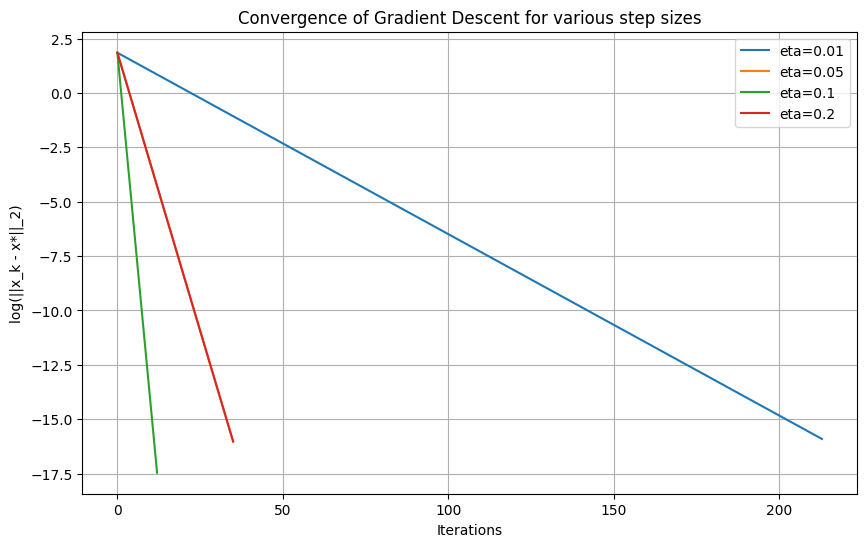

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x[0]**2 + 2*x[0]*x[1] + 3*x[1]**2 - 4*x[0] - 4*x[1]

def grad_f(x):
    grad_x1 = 6*x[0] + 2*x[1] - 4
    grad_x2 = 2*x[0] + 6*x[1] - 4
    return np.array([grad_x1, grad_x2])

x_star = np.array([0.5, 0.5])

def gradient_descent(x0, eta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    trajectory = [x.copy()]
    iters = 0
    while np.linalg.norm(grad_f(x)) > tol and iters < max_iters:
        x = x - eta * grad_f(x)
        trajectory.append(x.copy())
        iters += 1
    return np.array(trajectory)

x0 = np.array([5.0, 5.0])
tol = 1e-6
etas = [0.01, 0.05, 0.1, 0.2]
trajectories = {}

for eta in etas:
    traj = gradient_descent(x0, eta, tol)
    trajectories[eta] = traj
    print(f"Step size eta={eta}: converged in {traj.shape[0]-1} iterations; final point: {traj[-1]}")

plt.figure(figsize=(10, 6))
for eta in etas:
    traj = trajectories[eta]
    errors = np.linalg.norm(traj - x_star, axis=1)
    plt.plot(np.log(errors), label=f'eta={eta}')

plt.xlabel('Iterations')
plt.ylabel('log(||x_k - x*||_2)')
plt.title('Convergence of Gradient Descent for various step sizes')
plt.legend()
plt.grid(True)
plt.show()


### Convergence Rate

Based on the graph shown in the image, the convergence appears to be linear—i.e., the error decreases exponentially, which is typically observed as a straight line on a logarithmic scale versus iterations. This suggests that with each iteration, the error is reduced by a constant factor, consistent with a strongly convex and smooth optimization setting under a suitable step-size.

### Comparision

Based on the graph:

- For η = 0.01, the error decreases steadily but very slowly, reflecting a conservative step size.
- For η = 0.05, the descent is noticeably steeper, achieving faster convergence while still maintaining stability.
- For η = 0.2, the trajectory initially drops quickly but later shows signs of overshooting or oscillation, indicating that the aggressive step size may compromise stability even if it seems fast at first.

Overall, the medium step size (η = 0.05) strikes the best balance between speed and stability.

## Exercise 2.3

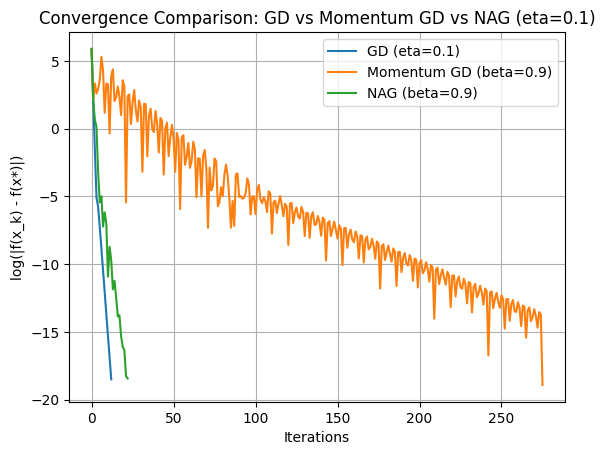

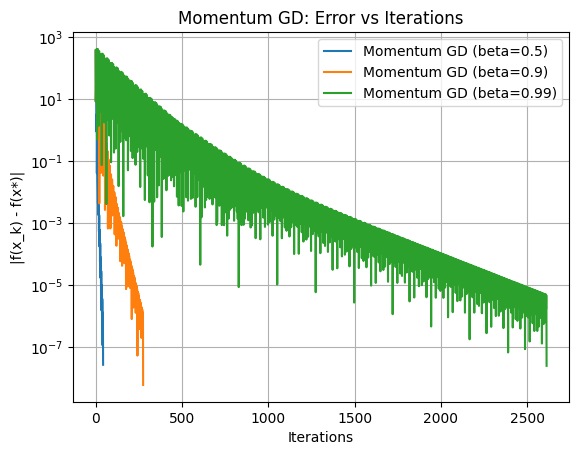

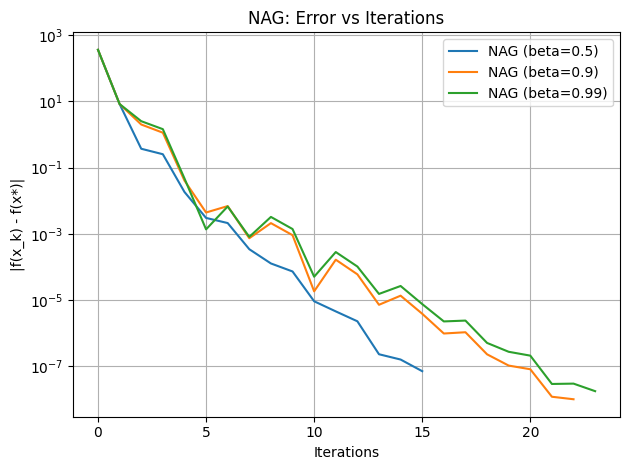

In [21]:
def f(x):
    return 3*x[0]**2 + 2*x[0]*x[1]**2 + 3*x[1]**2 - 4*x[0] - 4*x[1]

def grad_f(x):
    grad_x1 = 6*x[0] + 2*x[1] - 4
    grad_x2 = 2*x[0] + 6*x[1] - 4
    return np.array([grad_x1, grad_x2])

x_star = np.array([0.5, 0.5])
f_star = f(x_star)

def GD(x0, eta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    trajectory = [x.copy()]
    f_errors = [abs(f(x) - f_star)]
    for i in range(max_iters):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - eta * grad
        trajectory.append(x.copy())
        f_errors.append(abs(f(x) - f_star))
    return np.array(trajectory), np.array(f_errors)

def momentum_gd(x0, eta, beta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    v = np.zeros_like(x0)
    trajectory = [x.copy()]
    f_errors = [abs(f(x) - f_star)]
    for i in range(max_iters):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        v = beta * v - eta * grad
        x = x + v
        trajectory.append(x.copy())
        f_errors.append(abs(f(x) - f_star))
    return np.array(trajectory), np.array(f_errors)

def NAG(x0, eta, beta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    v = np.zeros_like(x0)
    trajectory = [x.copy()]
    f_errors = [abs(f(x) - f_star)]
    for i in range(max_iters):
        grad = grad_f(x + beta * v)
        if np.linalg.norm(grad) < tol:
            break
        v = beta * v - eta * grad
        x = x + v
        trajectory.append(x.copy())
        f_errors.append(abs(f(x) - f_star))
    return np.array(trajectory), np.array(f_errors)

x0 = np.array([5.0, 5.0])
eta = 0.1
tol = 1e-6
beta_fixed = 0.9

traj_gd, errors_gd = GD(x0, eta, tol)
traj_momentum, errors_momentum = momentum_gd(x0, eta, beta_fixed, tol)
traj_NAG, errors_NAG = NAG(x0, eta, beta_fixed, tol)

plt.figure(1)
plt.plot(np.log(errors_gd), label='GD (eta=0.1)')
plt.plot(np.log(errors_momentum), label='Momentum GD (beta=0.9)')
plt.plot(np.log(errors_NAG), label='NAG (beta=0.9)')
plt.xlabel('Iterations')
plt.ylabel('log(|f(x_k) - f(x*)|)')
plt.title('Convergence Comparison: GD vs Momentum GD vs NAG (eta=0.1)')
plt.legend()
plt.grid(True)
plt.show()
print()

betas = [0.5, 0.9, 0.99]

plt.figure(2)
plt.plot()
for beta in betas:
    traj, errs = momentum_gd(x0, eta, beta, tol)
    plt.plot(errs, label=f'Momentum GD (beta={beta})')
plt.xlabel('Iterations')
plt.ylabel('|f(x_k) - f(x*)|')
plt.yscale('log')
plt.title('Momentum GD: Error vs Iterations')
plt.legend()
plt.grid(True)
plt.show()
print()

plt.figure(3)
for beta in betas:
    traj, errs = NAG(x0, eta, beta, tol)
    plt.plot(errs, label=f'NAG (beta={beta})')
plt.xlabel('Iterations')
plt.ylabel('|f(x_k) - f(x*)|')
plt.yscale('log')
plt.title('NAG: Error vs Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Compare
From the plot, both Momentum GD and NAG descend faster than vanilla GD (steeper drop in the log-scale error), reflecting their improved convergence properties. The oscillations in Momentum GD’s curve suggest more aggressive steps, while NAG is typically smoother (less overshoot). Overall, these momentum-based methods reduce error more rapidly than plain GD in a strongly convex setting

## Analyse effect of momentum

Higher momentum (β close to 1) increases the “inertia” of the update, accelerating convergence once in the correct direction but risking overshoot if β is too high. From the plot, β=0.9 hits a good balance of quick reduction without large oscillations, while β=0.5 converges more conservatively and β=0.99 can overshoot, although it maintains a strong downward trend over time